In [11]:
import os
image_dir = 'images'
gallery_dir = 'images/gallery_paintings'

list_imgs = os.listdir(gallery_dir)
print(f"There are {len(list_imgs)} images in the dataset {gallery_dir}")

There are 31 images in the dataset images/gallery_paintings


In [14]:
%pip install torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.5 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 244 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 10.7 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 66 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 18.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from torchvision import datasets, transforms
import torch

# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(image_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)
print(len(image_datasets))

31


torch.Size([256, 256, 3])
tensor([[[0.4314, 0.4784, 0.4706,  ..., 0.4745, 0.4745, 0.3373],
         [0.4471, 0.4784, 0.4510,  ..., 0.4706, 0.4235, 0.3137],
         [0.4314, 0.4588, 0.4510,  ..., 0.4745, 0.4157, 0.3020],
         ...,
         [0.3725, 0.4392, 0.4745,  ..., 0.3882, 0.2980, 0.3333],
         [0.3686, 0.4549, 0.4431,  ..., 0.3765, 0.3176, 0.3686],
         [0.3490, 0.4157, 0.3765,  ..., 0.3608, 0.3176, 0.3529]],

        [[0.4863, 0.5804, 0.5922,  ..., 0.4980, 0.4784, 0.3294],
         [0.5176, 0.5961, 0.5922,  ..., 0.5216, 0.4627, 0.3255],
         [0.5137, 0.5922, 0.5922,  ..., 0.5412, 0.4588, 0.3137],
         ...,
         [0.2863, 0.3451, 0.3608,  ..., 0.3020, 0.2196, 0.2392],
         [0.2667, 0.3451, 0.3333,  ..., 0.2902, 0.2471, 0.2784],
         [0.2667, 0.3137, 0.2784,  ..., 0.2627, 0.2275, 0.2471]],

        [[0.5608, 0.6980, 0.7333,  ..., 0.4980, 0.4588, 0.2980],
         [0.6078, 0.7373, 0.7529,  ..., 0.5647, 0.4863, 0.3294],
         [0.6078, 0.7490, 0.7569

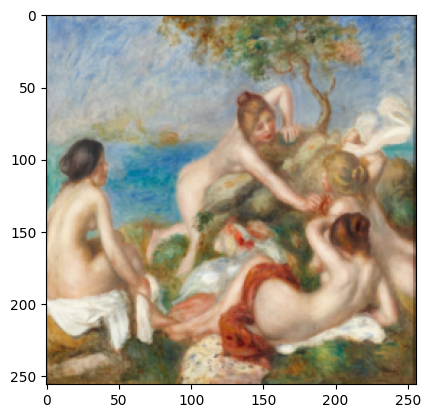

In [15]:
import numpy as np
import matplotlib.pyplot as plt

i=0
for img, _ in dloader:
      print(np.transpose(img[0], (1,2,0)).shape)
      print(img[i])
      plt.imshow((img[i].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
      plt.show()
      i = i + 1
      break

In [16]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

# Select the desired layer
layer = model._modules.get('avgpool')

outputs = []
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /Users/jaimielee/.cache/torch/hub/v0.10.0.zip
/Users/jaimielee/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jaimielee/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/jaimielee/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 11.8MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for img, _ in dloader:
    _ = model(img)
print(len(outputs))

4


In [18]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]

print(len(list_embeddings))
print(np.array(list_embeddings[0]).shape)

31
(512,)


In [19]:
list_embeddings

[[0.12096181511878967,
  0.6443790197372437,
  0.0,
  2.1563005447387695,
  0.21977189183235168,
  0.9811676740646362,
  0.10822820663452148,
  2.7334933280944824,
  2.517904758453369,
  3.7666175365448,
  0.016868093982338905,
  1.9813421964645386,
  0.03600339591503143,
  0.5209305286407471,
  0.8396078944206238,
  1.8941450119018555,
  0.796048641204834,
  0.6291766166687012,
  0.09689925611019135,
  1.531174659729004,
  0.05024418607354164,
  0.007052505388855934,
  0.07546438276767731,
  0.2185213714838028,
  0.10542665421962738,
  1.8604252338409424,
  0.23277617990970612,
  1.5767796039581299,
  1.5209920406341553,
  1.1880789995193481,
  0.4383484721183777,
  2.2772750854492188,
  0.7431691884994507,
  0.3591119945049286,
  0.28015854954719543,
  0.4458209276199341,
  0.8178876042366028,
  0.003747294656932354,
  0.9639107584953308,
  0.4173261523246765,
  1.2233415842056274,
  0.22377172112464905,
  1.08113431930542,
  1.4594610929489136,
  0.2083992063999176,
  1.039191603660